# Zadanie 5

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]


In [1]:
import numpy as np
import random as rd
import gymnasium as gym
import matplotlib.pyplot as plt

In [6]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int,
        action_space: int,
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((observation_space, action_space))

    def __call__(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self.q_table[state, action]

    def update(self, state: np.ndarray, action: np.ndarray, reward: float, next_state: int) -> None:
        """Update Q-value of given state and action."""
        current_q: np.ndarray = self.q_table[state, action]
        max_next_q: float = np.max(self.q_table[next_state])
        new_q: np.ndarray = current_q + self.learning_rate * (reward + self.gamma * max_next_q - current_q)
        self.q_table[state, action] = new_q

    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""       
        return np.argmax(self.q_table[state])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        return f"QLearningSolver(observation_space={self.observation_space}, action_space={self.action_space}, \
                learning_rate={self.learning_rate}, gamma={self.gamma}, epsilon={self.epsilon})"

    def __str__(self):
        return self.__repr__()

def train(env_handler, q_params, learning_iter, plots: bool, verbose: bool=False):
    observation_space = env_handler.observation_space.n
    action_space = env_handler.action_space.n

    # Inicjalizacja solvera
    #0.1 ; 0.9 ; 0.1
    q_solver = QLearningSolver(observation_space, action_space, q_params[0], q_params[1], q_params[2])

    # Trening
    num_episodes = learning_iter
    all_rewards = []
    for episode in range(num_episodes):
        state = env_handler.reset()[0]
        done = False
        total_reward = 0
        
        while not done:
            # Wybór akcji
            if q_solver.epsilon > rd.random():
                action = env_handler.action_space.sample()
            else:
                action = q_solver.get_best_action(state)
            
            # Wykonanie akcji
            next_state, reward, done= env_handler.step(action)[0:3]
            
            # Update wartości q
            q_solver.update(state, action, reward, next_state)
            
            total_reward += reward
            state = next_state
            
        

        all_rewards.append(total_reward)
        if episode % 10 == 0 and verbose:
            print(f"Episode: {episode}, Total Reward: {total_reward}")
    if plots:
        fig1 = plt.plot(all_rewards)
        plt.xlabel('Epizod')
        plt.ylabel('suma nagród')
        plt.title(f'Wykres sumy nagród uzyskanych w poszczególnych iteracjach uczących\nLiczba iteracji uczących: {num_episodes}')
        plt.show()
    return q_solver


def tester(env_handler, q_solver, testing_iter, plots: bool, verbose: bool=False):
    test_rewards = []
    # test_episodes = 500
    for episode in range(testing_iter):
        state = env_handler.reset()[0]
        done = False
        total_reward = 0
        
        while not done:
            action = q_solver.get_best_action(state)
            # print(f'stan:{state}; akcja: {action}')
            next_state, reward, done= env_handler.step(action)[0:3]
            total_reward += reward
            state = next_state
            env_handler.render()
        test_rewards.append(total_reward)
        if episode % 10 == 0 and verbose:
            print(f"Test Episode: {episode}, Total Reward: {total_reward}")

    if plots:
        fig2 = plt.plot(test_rewards)
        plt.ylim([-10, 20])
        plt.xlabel('Epizod')
        plt.ylabel('Suma nagród')
        plt.title(f'Wykres sumy nagród uzyskanych przy rozwiązywaniu problemu\nLiczba podejść = {test_episodes}')
        plt.show()



# Eksperymenty

Episode: 0, Total Reward: -1133
Episode: 10, Total Reward: -1276
Episode: 20, Total Reward: -248
Episode: 30, Total Reward: -225
Episode: 40, Total Reward: -109
Episode: 50, Total Reward: -214
Episode: 60, Total Reward: -412
Episode: 70, Total Reward: -142
Episode: 80, Total Reward: -278
Episode: 90, Total Reward: -58
Episode: 100, Total Reward: -23
Episode: 110, Total Reward: -60
Episode: 120, Total Reward: -177
Episode: 130, Total Reward: -114
Episode: 140, Total Reward: -178
Episode: 150, Total Reward: -3
Episode: 160, Total Reward: -46
Episode: 170, Total Reward: -294
Episode: 180, Total Reward: -92
Episode: 190, Total Reward: -3
Episode: 200, Total Reward: -63
Episode: 210, Total Reward: -10
Episode: 220, Total Reward: -35
Episode: 230, Total Reward: -62
Episode: 240, Total Reward: 4
Episode: 250, Total Reward: 11
Episode: 260, Total Reward: -51
Episode: 270, Total Reward: 4
Episode: 280, Total Reward: 4
Episode: 290, Total Reward: -1
Episode: 300, Total Reward: 7
Episode: 310, To

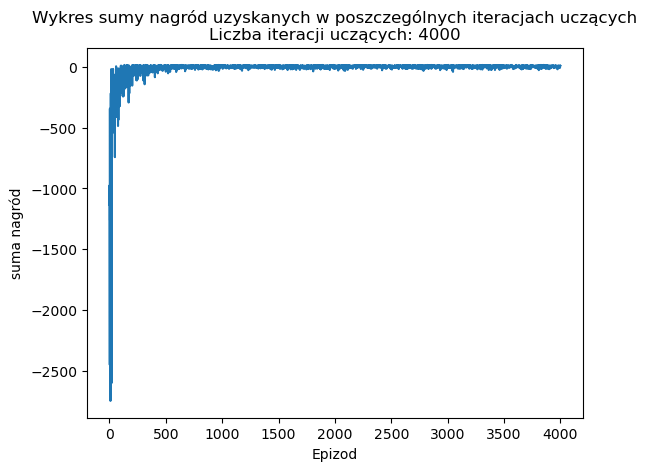

Test Episode: 0, Total Reward: 8
Test Episode: 10, Total Reward: 9


KeyboardInterrupt: 

In [7]:
q_params = [0.3, 0.9, 0.1]

train_env = gym.make('Taxi-v3')

q_solver = train(train_env, q_params, 4000, True, False)

test_env = gym.make('Taxi-v3',render_mode='human')

tester(test_env, q_solver, 5, True, True)

In [5]:
env = gym.make('Taxi-v3', render_mode='human')
q_params = [0.3, 0.9, 0.1]

tester_3000(env, q_params, 4000, True, False)

KeyboardInterrupt: 

# Wnioski